The Goal of this notebook is to predict the smoker status of an individual through
the different parameters that are given. 
This is a classical binary classficiation task.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./playground-series/train.csv")
test_data = pd.read_csv('./playground-series/test.csv')

In [3]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
df = pd.get_dummies(df, columns=['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'], dtype=int)

In [5]:
train_y = df.smoking
train_x = df.drop(columns=["smoking", "id"])
train_x, dev_x, train_y, dev_y = train_test_split(train_x, train_y, test_size=0.05, random_state=42)


In [6]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=4, random_state=42)
gb.fit(train_x, train_y)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, random_state=42)

AUC: 0.831161208634195


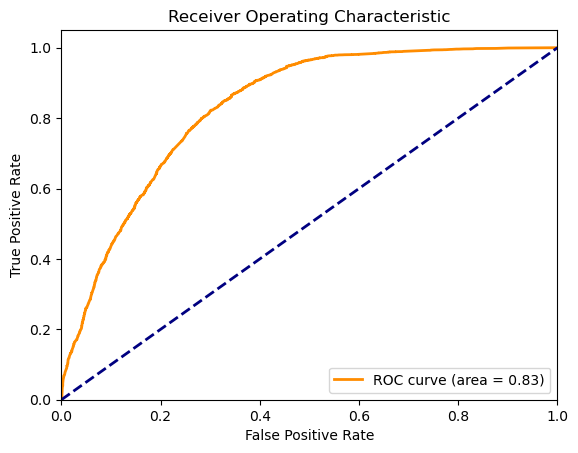

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(model, x_test, y_test):
    # Predict probabilities
    test_probabilities = model.predict_proba(x_test)[:, 1]

    # Compute ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)

    # Calculate AUC
    auc = roc_auc_score(y_test, test_probabilities)
    print(f"AUC: {auc}")

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Use the function
plot_roc_curve(gb, dev_x, dev_y)


In [8]:
predictions = gb.predict_proba(test_data.drop(columns='id'))[:, 1]

submission = pd.DataFrame({
    'id': test_data['id'],
    'smoking': predictions
})
submission.to_csv('my_submission.csv', index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Urine protein
- dental caries
- hearing(left)
- hearing(right)
Feature names seen at fit time, yet now missing:
- Urine protein_1
- Urine protein_2
- Urine protein_3
- Urine protein_4
- Urine protein_5
- ...
